In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train),(x_test, y_test) = mnist

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train/ 255.0

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test / 255.0


In [8]:
model= tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
          tf.keras.layers.MaxPool2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
          tf.keras.layers.MaxPool2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1213 - accuracy: 0.9634
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0406 - accuracy: 0.9871
Epoch 3/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 4/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0211 - accuracy: 0.9935
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0150 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0116 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 8/10
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0082 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0062 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 79s 42m

In [12]:
test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0386 - accuracy: 0.9897


In [15]:
print(y_test[0:50])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]


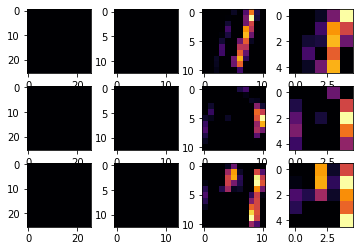

In [17]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=4
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)